In [ ]:
#download the data set from the kaggle  
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

Saving kaggle.json to kaggle.json
 69% 17.0M/24.5M [00:00<00:00, 34.2MB/s]
100% 24.5M/24.5M [00:00<00:00, 41.7MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('human-activity-recognition-with-smartphones.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
train = pd.read_csv('/content/data/train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
test = pd.read_csv('/content/data/test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [ ]:
train.shape

(7352, 563)

In [ ]:
test.shape

(2947, 563)

In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [ ]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [ ]:
#set the parameter in figure
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

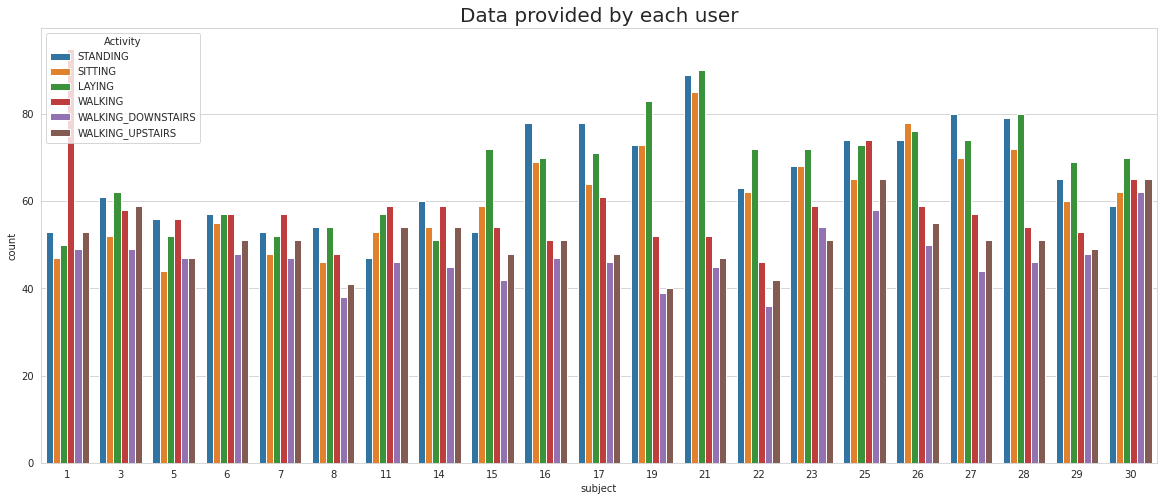

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


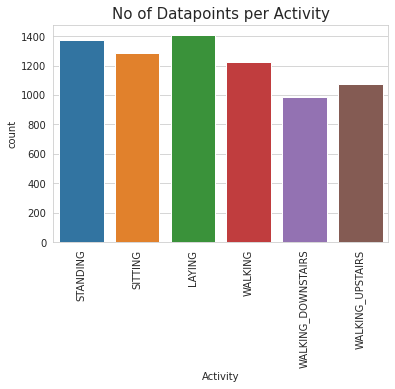

Our data is well balanced almost


In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()
print("Our data is well balanced almost")

In [ ]:
# removing the parantheses form the features name 
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
train.to_csv('f_train.csv', index=False)
test.to_csv('f_test.csv', index=False)

In [ ]:
def display_all_details(dataframe):
  print(('='*50)+'DATA'+('='*50))
  print(('-'*50)+'SHAPE'+('-'*50))
  print(dataframe.shape)
  print(('-'*50)+'COLUMNS'+('-'*50))
  print(dataframe.columns)
  print(('-'*50)+'DESCRIBE'+('-'*50))
  print(dataframe.describe())
  print(('-'*50)+'INFO'+('-'*50))
  print(dataframe.info()) 
  print(('='*50)+"===="+('='*50))
  



In [ ]:
  display_all_details(train)

==================================================DATA==================================================
--------------------------------------------------SHAPE--------------------------------------------------
(7352, 563)
--------------------------------------------------COLUMNS--------------------------------------------------
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)
--------------------------------------------------DESCRIBE--------------------------------------------------
       tBodyAccmeanX  tBodyAccmeanY  ...  angleZgr

In [ ]:
def display_all_details(dataframe):
  print(('='*50)+'DATA'+('='*50))
  print(('-'*50)+'SHAPE'+('-'*50))
  print(dataframe.shape)
  print(('-'*50)+'COLUMNS'+('-'*50))
  print(dataframe.columns)
  print(('-'*50)+'DESCRIBE'+('-'*50))
  print(dataframe.describe())
  print(('-'*50)+'INFO'+('-'*50))
  print(dataframe.info())
  print(('='*50)+"===="+('='*50))
  



In [ ]:
display_all_details(test)

==================================================DATA==================================================
--------------------------------------------------SHAPE--------------------------------------------------
(2947, 563)
--------------------------------------------------COLUMNS--------------------------------------------------
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)
--------------------------------------------------DESCRIBE--------------------------------------------------
       tBodyAccmeanX  tBodyAccmeanY  ...  angleZgr

In [ ]:
# The data has no missing values in the form of NaN.
X= train.drop(columns=['Activity'])
X=X.values
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

Since there are 561 predictors, we are using PCA to reduce the number of predictors which will help us in visualization.

In [ ]:
df2= pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
df2['activity']=train['Activity']
df2.head()

,PC1,PC2,PC3,activity
0,15.727224,-7.246259,-0.465589,STANDING
1,15.723317,-7.260690,-0.259002,STANDING
2,15.742570,-7.204006,0.106483,STANDING
3,15.715666,-7.403807,0.719931,STANDING
4,15.703153,-7.473707,0.987220,STANDING


**VIZUALIZING THE DISTRIBUTION OF THE COLUMNS
**

###Since PC1, PC2, PC3 is continuous in nature, we will use histogram to visualize it.For Activity, we will use bar chart because it is categorical in nature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc62a74f50>,
      dtype=object)

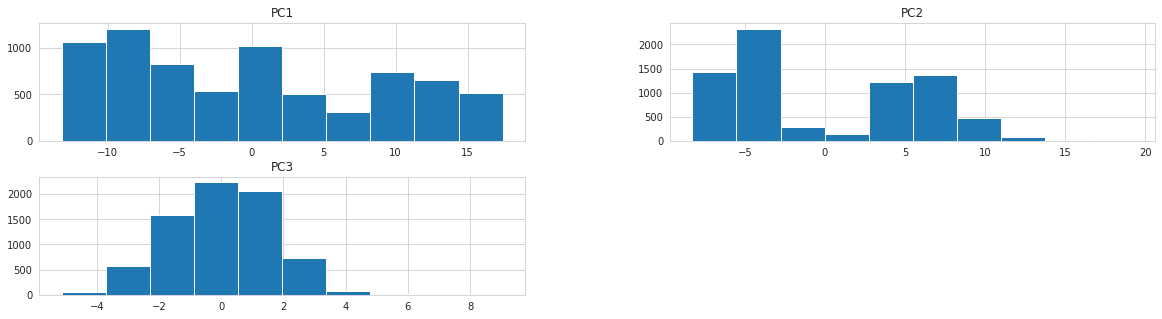

In [ ]:
df2.hist(['PC1','PC2','PC3'],figsize=(20,5))

In [ ]:
def bar_graph(data,predictor):
    grouped=data.groupby(predictor)
    chart=grouped.size().plot.bar(rot=0, title='Bar Chart showing the total frequency of different '+str(predictor), figsize=(15,4))
    chart.set_xlabel(predictor)

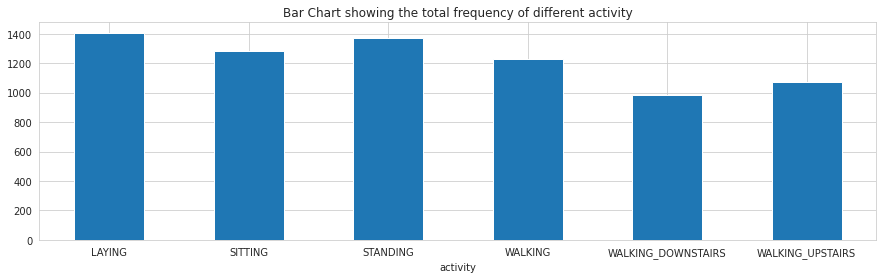

In [ ]:
bar_graph(df2,'activity')

In [ ]:
df2.activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: activity, dtype: int64

##VIZUALIZING THE RELATIONSHIP BETWEEN THE PREDICTORS AND THE TARGET VARIABLE
### Using boxplot to see the relationship between categorical target variable and continuous predictors.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc629db2d0>,
      dtype=object)

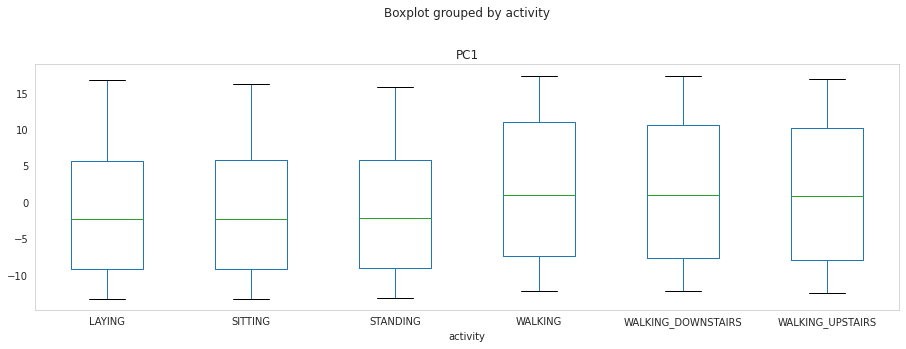

In [ ]:
df2.boxplot(column=['PC1'], by='activity', figsize=(15,10),grid=False, layout=(2,1))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


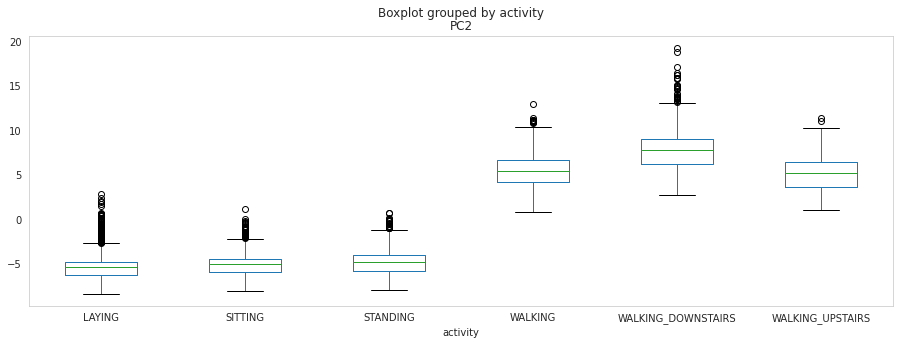

In [ ]:
df2.boxplot(column=['PC2'], by='activity', figsize=(15,5),grid=False)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


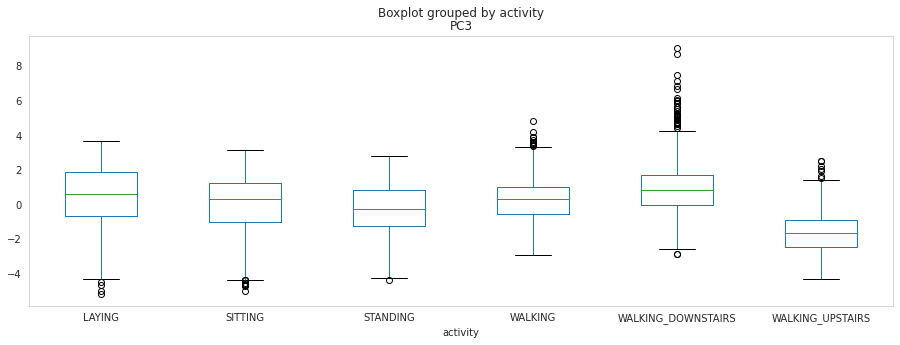

In [ ]:
df2.boxplot(column=['PC3'], by='activity', figsize=(15,5),grid=False)


STATISTICAL TEST FOR CORRELATION

### We used ANOVA test to check whether the predictors are correlated with the target variable.



In [ ]:
def anova_test(data,target,predictor):
    data1=data.groupby(target)[predictor].apply(list)
    from scipy.stats import f_oneway
    AnovaResults = f_oneway(*data1)
    if AnovaResults[1]<0.05:
        print(str(predictor)+' is related with the target variable : ', AnovaResults[1])
    else:
        print(str(predictor)+' is NOT related with the target variable : ', AnovaResults[1])

In [ ]:
anova_test(df2,'activity','PC1')

PC1 is related with the target variable :  3.434667375965409e-24


In [ ]:
anova_test(df2,'activity','PC2')

PC2 is related with the target variable :  0.0


In [ ]:
anova_test(df2,'activity','PC3')

PC3 is related with the target variable :  0.0


TREATING THE CATEGORICAL VARIABLE

In [ ]:
df2.activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
activity_mapping = {'STANDING': 1,
                'SITTING': 2,
                'LAYING': 3,
              'WALKING': 4,
               'WALKING_DOWNSTAIRS': 5,
               'WALKING_UPSTAIRS':6
              }
# encoding the Ordinal variable cut
train['Activity'] = train['Activity'].map(activity_mapping)

# Checking the encoded columns
train['Activity'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.

In [ ]:
TargetVariable='Activity'
df2=train.drop(columns=['Activity','subject'])
predictor = df2.columns
x=train[predictor].values
y =train[TargetVariable].values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5146, 561) (2206, 561) (5146,) (2206,)


APPLYING DIFFERENT ALGORITHMS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Logistic Regression

In [ ]:
clf = LogisticRegression(C=1)
# Creating the model on Training Data
LOG=clf.fit(x_train,y_train)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       411
           2       0.96      0.94      0.95       386
           3       1.00      1.00      1.00       428
           4       1.00      0.99      1.00       366
           5       0.99      1.00      1.00       311
           6       0.99      0.99      0.99       304

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206

[[396  15   0   0   0   0]
 [ 22 364   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 364   0   2]
 [  0   0   0   1 310   0]
 [  0   0   0   0   2 302]]
Accuracy of the model: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


K-NEAREST CLASSIFIER

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
# Creating the model on Training Data
KNN=clf.fit(x_train,y_train)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.86      0.95      0.90       411
           2       0.94      0.84      0.88       386
           3       1.00      1.00      1.00       428
           4       0.98      1.00      0.99       366
           5       1.00      0.97      0.99       311
           6       0.99      0.99      0.99       304

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206

[[389  22   0   0   0   0]
 [ 62 323   1   0   0   0]
 [  1   0 427   0   0   0]
 [  0   0   0 365   0   1]
 [  0   0   0   6 302   3]
 [  0   0   0   2   0 302]]
Accuracy of the model: 0.96


DECISION TREE CLASSIFIER

              precision    recall  f1-score   support

           1       0.91      0.87      0.89       411
           2       0.86      0.91      0.89       386
           3       1.00      1.00      1.00       428
           4       0.80      0.90      0.85       366
           5       0.92      0.81      0.86       311
           6       0.83      0.81      0.82       304

    accuracy                           0.89      2206
   macro avg       0.89      0.88      0.88      2206
weighted avg       0.89      0.89      0.89      2206

[[356  55   0   0   0   0]
 [ 34 352   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 329   3  34]
 [  0   0   0  42 252  17]
 [  1   0   0  38  20 245]]
Accuracy of the model: 0.89


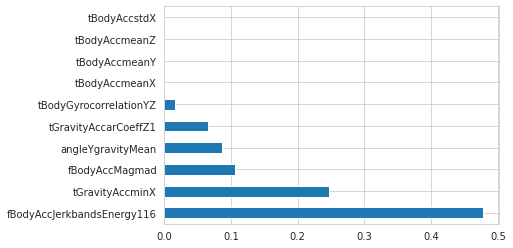

In [ ]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')
# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           1       0.81      0.95      0.88       411
           2       0.94      0.77      0.85       386
           3       1.00      1.00      1.00       428
           4       0.91      0.96      0.93       366
           5       0.96      0.83      0.89       311
           6       0.87      0.93      0.90       304

    accuracy                           0.91      2206
   macro avg       0.91      0.91      0.91      2206
weighted avg       0.92      0.91      0.91      2206

[[392  19   0   0   0   0]
 [ 89 297   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 350   3  13]
 [  0   0   0  22 258  31]
 [  0   0   0  14   7 283]]
Accuracy of the model: 0.91


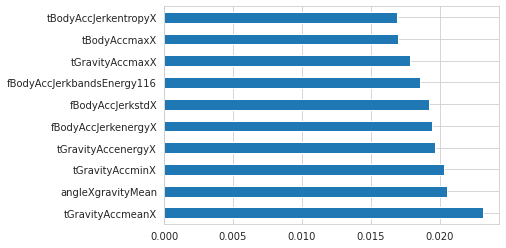

In [ ]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_train,y_train)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

support vector machine

In [ ]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM=clf.fit(x_train,y_train)
prediction=SVM.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       411
           2       0.97      0.96      0.96       386
           3       1.00      1.00      1.00       428
           4       1.00      1.00      1.00       366
           5       0.99      1.00      1.00       311
           6       1.00      0.99      1.00       304

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206

[[398  13   0   0   0   0]
 [ 15 371   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 366   0   0]
 [  0   0   0   0 311   0]
 [  0   0   0   0   2 302]]
Accuracy of the model: 0.99


In [ ]:
!pip install Counter

  Created wheel for Counter: filename=Counter-1.0.0-cp37-none-any.whl size=5412 sha256=aa1a24c0446511a6628c3c0672a95fc9b6fb82f1fbbe24f9719f9d9b41e3684c
  Stored in directory: /root/.cache/pip/wheels/06/16/20/5f223d85f959078fee0f6f769c6aa32a6f653d9449c1b205c3
Successfully built Counter


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smk=SMOTE(random_state=42)
x_smote,y_smote=smk.fit_sample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_smote))


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Resampled dataset shape Counter({2: 979, 6: 979, 4: 979, 5: 979, 1: 979, 3: 979})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=42)
x_over,y_over= ros.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({2: 979, 6: 979, 4: 979, 5: 979, 1: 979, 3: 979})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=42)
x_under,y_under= rus.fit_resample(x_train,y_train)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({1: 675, 2: 675, 3: 675, 4: 675, 5: 675, 6: 675})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#LoGistic Regression

In [ ]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_smote,y_smote)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       411
           2       0.96      0.95      0.95       386
           3       1.00      1.00      1.00       428
           4       1.00      0.99      1.00       366
           5       0.99      0.99      0.99       311
           6       0.99      0.99      0.99       304

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206

[[397  14   0   0   0   0]
 [ 21 365   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 364   0   2]
 [  0   0   0   1 308   2]
 [  0   0   0   0   3 301]]
Accuracy of the model: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_over,y_over)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       411
           2       0.96      0.95      0.95       386
           3       1.00      1.00      1.00       428
           4       0.99      0.99      0.99       366
           5       0.99      0.99      0.99       311
           6       0.99      0.99      0.99       304

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206

[[396  15   0   0   0   0]
 [ 21 365   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 363   0   3]
 [  0   0   0   2 309   0]
 [  0   0   0   1   2 301]]
Accuracy of the model: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf = LogisticRegression(C=1)

# Creating the model on Training Data
LOG=clf.fit(x_under,y_under)
prediction=LOG.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       411
           2       0.96      0.95      0.95       386
           3       1.00      1.00      1.00       428
           4       0.99      0.99      0.99       366
           5       0.99      1.00      0.99       311
           6       0.99      0.99      0.99       304

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206

[[395  16   0   0   0   0]
 [ 21 365   0   0   0   0]
 [  0   0 427   0   1   0]
 [  0   0   0 364   0   2]
 [  0   0   0   1 310   0]
 [  0   0   0   1   2 301]]
Accuracy of the model: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# K - Nearest classifier after sampling
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_smote,y_smote)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.89      0.91      0.90       411
           2       0.90      0.88      0.89       386
           3       1.00      1.00      1.00       428
           4       0.99      1.00      1.00       366
           5       1.00      0.99      1.00       311
           6       0.99      0.99      0.99       304

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206

[[373  38   0   0   0   0]
 [ 45 340   1   0   0   0]
 [  1   0 427   0   0   0]
 [  0   0   0 365   0   1]
 [  0   0   0   0 308   3]
 [  0   0   0   2   0 302]]
Accuracy of the model: 0.96


In [ ]:
KNN=clf.fit(x_over,y_over)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.86      0.95      0.90       411
           2       0.94      0.84      0.89       386
           3       1.00      0.99      1.00       428
           4       0.98      1.00      0.99       366
           5       0.99      0.98      0.99       311
           6       0.99      0.99      0.99       304

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206

[[390  21   0   0   0   0]
 [ 61 324   1   0   0   0]
 [  1   1 425   0   1   0]
 [  0   0   0 365   0   1]
 [  0   0   0   4 304   3]
 [  0   0   0   2   1 301]]
Accuracy of the model: 0.96


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_under,y_under)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.85      0.93      0.89       411
           2       0.91      0.82      0.86       386
           3       1.00      0.99      1.00       428
           4       0.98      1.00      0.99       366
           5       1.00      0.97      0.99       311
           6       0.98      1.00      0.99       304

    accuracy                           0.95      2206
   macro avg       0.95      0.95      0.95      2206
weighted avg       0.95      0.95      0.95      2206

[[382  29   0   0   0   0]
 [ 68 316   1   0   0   1]
 [  1   2 425   0   0   0]
 [  0   0   0 365   0   1]
 [  0   0   0   5 303   3]
 [  0   0   0   1   0 303]]
Accuracy of the model: 0.95


              precision    recall  f1-score   support

           1       0.91      0.87      0.89       411
           2       0.86      0.91      0.89       386
           3       1.00      1.00      1.00       428
           4       0.82      0.88      0.85       366
           5       0.92      0.81      0.86       311
           6       0.81      0.83      0.82       304

    accuracy                           0.89      2206
   macro avg       0.89      0.88      0.88      2206
weighted avg       0.89      0.89      0.89      2206

[[356  55   0   0   0   0]
 [ 34 352   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 322   3  41]
 [  0   0   0  40 252  19]
 [  1   0   0  30  20 253]]
Accuracy of the model: 0.89


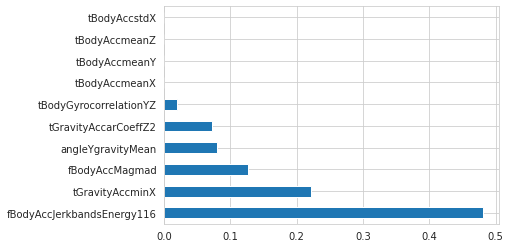

In [ ]:
# Decision -tree after sampling 
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_smote,y_smote)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.91      0.86      0.89       411
           2       0.86      0.91      0.89       386
           3       1.00      1.00      1.00       428
           4       0.80      0.90      0.85       366
           5       0.92      0.81      0.86       311
           6       0.82      0.81      0.82       304

    accuracy                           0.89      2206
   macro avg       0.89      0.88      0.88      2206
weighted avg       0.89      0.89      0.89      2206

[[355  56   0   0   0   0]
 [ 34 352   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 329   3  34]
 [  0   0   0  42 251  18]
 [  1   0   0  38  20 245]]
Accuracy of the model: 0.89


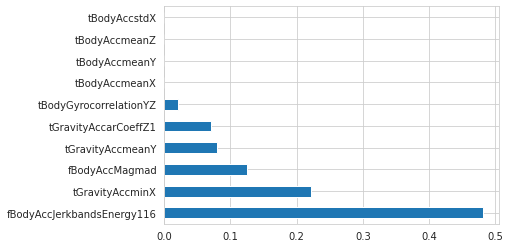

In [ ]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_over,y_over)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.91      0.86      0.89       411
           2       0.86      0.91      0.89       386
           3       1.00      1.00      1.00       428
           4       0.81      0.90      0.85       366
           5       0.92      0.81      0.86       311
           6       0.83      0.81      0.82       304

    accuracy                           0.89      2206
   macro avg       0.89      0.88      0.88      2206
weighted avg       0.89      0.89      0.89      2206

[[354  57   0   0   0   0]
 [ 33 353   0   0   0   0]
 [  0   1 427   0   0   0]
 [  0   0   0 329   3  34]
 [  0   0   0  41 253  17]
 [  1   0   0  38  20 245]]
Accuracy of the model: 0.89


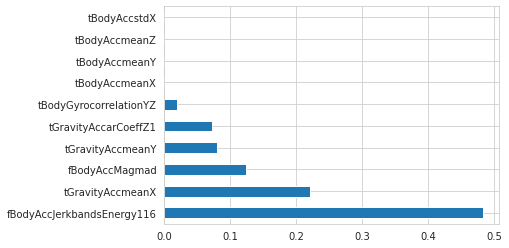

In [ ]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(x_under,y_under)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.83      0.95      0.89       411
           2       0.94      0.80      0.86       386
           3       1.00      1.00      1.00       428
           4       0.93      0.95      0.94       366
           5       0.96      0.84      0.90       311
           6       0.86      0.94      0.90       304

    accuracy                           0.92      2206
   macro avg       0.92      0.91      0.91      2206
weighted avg       0.92      0.92      0.92      2206

[[390  21   0   0   0   0]
 [ 79 307   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 348   3  15]
 [  0   0   0  17 262  32]
 [  0   0   0  10   8 286]]
Accuracy of the model: 0.92


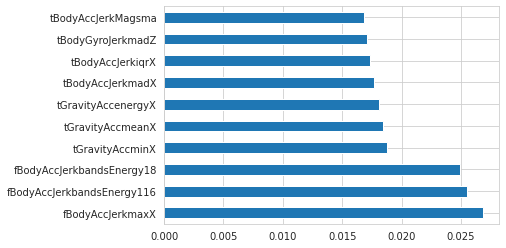

In [ ]:
# Random forest after sampling
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_smote,y_smote)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.87      0.95      0.91       411
           2       0.94      0.85      0.89       386
           3       1.00      1.00      1.00       428
           4       0.92      0.95      0.94       366
           5       0.96      0.82      0.89       311
           6       0.85      0.94      0.89       304

    accuracy                           0.92      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.93      0.92      0.92      2206

[[389  22   0   0   0   0]
 [ 58 328   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 348   3  15]
 [  0   0   0  19 256  36]
 [  0   0   0  11   7 286]]
Accuracy of the model: 0.92


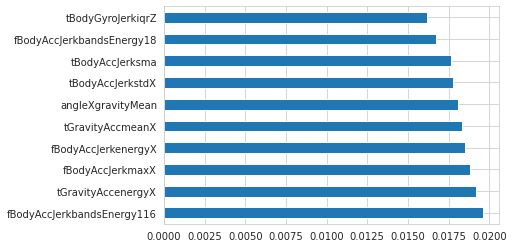

In [ ]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_over,y_over)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           1       0.86      0.94      0.90       411
           2       0.93      0.84      0.88       386
           3       1.00      1.00      1.00       428
           4       0.93      0.95      0.94       366
           5       0.96      0.84      0.89       311
           6       0.86      0.94      0.90       304

    accuracy                           0.92      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.93      0.92      0.92      2206

[[387  24   0   0   0   0]
 [ 61 325   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 349   4  13]
 [  0   0   0  17 260  34]
 [  0   0   0  10   7 287]]
Accuracy of the model: 0.92


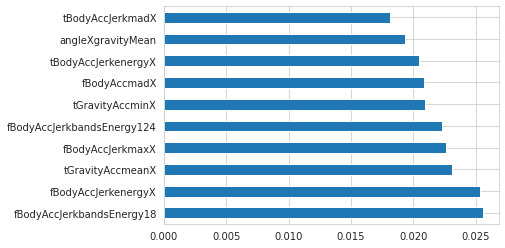

In [ ]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')

# Creating the model on Training Data
RF=clf.fit(x_under,y_under)
prediction=RF.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predictor)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# support vector classifier after sampling
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM_smote=clf.fit(x_smote,y_smote)
prediction=SVM_smote.predict(x_test)

# Measuring accuracy on Testing Datam
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.97      0.96       411
           2       0.97      0.96      0.96       386
           3       1.00      1.00      1.00       428
           4       1.00      1.00      1.00       366
           5       0.99      1.00      1.00       311
           6       1.00      0.99      1.00       304

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206

[[398  13   0   0   0   0]
 [ 17 369   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 366   0   0]
 [  0   0   0   0 311   0]
 [  0   0   0   0   2 302]]
Accuracy of the model: 0.99


In [ ]:


clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM_over=clf.fit(x_over,y_over)
prediction=SVM_over.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.97      0.96       411
           2       0.97      0.96      0.96       386
           3       1.00      1.00      1.00       428
           4       1.00      1.00      1.00       366
           5       0.99      1.00      1.00       311
           6       1.00      0.99      1.00       304

    accuracy                           0.99      2206
   macro avg       0.99      0.99      0.99      2206
weighted avg       0.99      0.99      0.99      2206

[[398  13   0   0   0   0]
 [ 16 370   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 366   0   0]
 [  0   0   0   0 311   0]
 [  0   0   0   0   2 302]]
Accuracy of the model: 0.99


In [ ]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')

# Creating the model on Training Data
SVM_under =clf.fit(x_under,y_under)
prediction=SVM_under.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       411
           2       0.95      0.95      0.95       386
           3       1.00      1.00      1.00       428
           4       1.00      1.00      1.00       366
           5       0.99      1.00      1.00       311
           6       1.00      0.99      1.00       304

    accuracy                           0.98      2206
   macro avg       0.98      0.98      0.98      2206
weighted avg       0.98      0.98      0.98      2206

[[393  18   0   0   0   0]
 [ 18 368   0   0   0   0]
 [  0   0 428   0   0   0]
 [  0   0   0 365   0   1]
 [  0   0   0   0 311   0]
 [  0   0   0   0   2 302]]
Accuracy of the model: 0.98


K-FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_values= cross_val_score(SVM_under, x, y, cv=10, scoring='f1_weighted')
print(accuracy_values)
print('Final Average Accuracy of the Model:',accuracy_values.mean())

[0.98238966 0.85759315 0.96461058 0.87449956 0.95749073 0.93045737
 0.96223334 0.98911789 0.97278141 0.97959616]
Final Average Accuracy of the Model: 0.947076985236022


In [ ]:
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('pca', PCA(n_components=3)), ('svc', SVC())])
n = np.random.randint(0,2200,size=1)
datax= x_test[n]
datay = y_test[n]


In [ ]:
prediction_svm = SVM.predict(datax)
prediction_logistic = LOG.predict(datax)
prediction_random = RF.predict(datax)
prediction_decision = DTree.predict(datax)
prediction_knearest = KNN.predict(datax)

print("====================== True Prediction===============================")
print(datay)
print("======================== SVM ========================================")
print(prediction_svm)
print("======================== LOGISTIC REGRESSION ========================================")
print(prediction_logistic)
print("======================== DECISION TREE ========================================")
print(prediction_decision)
print("======================== RANDOM FOREST ========================================")
print(prediction_random)
print("======================== KNN ========================================")
print(prediction_knearest)

====================== True Prediction===============================
[3]
======================== SVM ========================================
[3]
======================== LOGISTIC REGRESSION ========================================
[3]
======================== DECISION TREE ========================================
[3]
======================== RANDOM FOREST ========================================
[3]
======================== KNN ========================================
[3]
